<a href="https://colab.research.google.com/github/ndeleonardis/DataSetNoeliaDeLeonardis/blob/main/entregable_dataset_noelia_de_leonardis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargamaos el archivo usamos URL cruda del archivo CSV que esta en nuestro GitHub
url = 'https://raw.githubusercontent.com/ndeleonardis/DataSetNoeliaDeLeonardis/main/Housing.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(url)
    print("El archivo CSV se ha cargado exitosamente.")
except Exception as e:
    print("Se produjo un error al cargar el archivo CSV:", e)

El archivo CSV se ha cargado exitosamente.


### Entrega 1
### Housing Price Dataset

Data set con tendencia de precios de propiedades en función de características básicas tales como  (superficie, cantidad de habitaciones etc) y ubicación geográfica.
En primer lugar lo que hice fue traducir los nombres de columnas y buscar definiciones de cada columna a fin de mejorar el entendimiento del negocio, si bien es de precio de propiedades algunas columnas no estaba segura de su significado y me ayudo buscar su definición. Posterior a este epaso  ejecute varios comandos básicos de la librería panda para ver resumen de datos y mejorar tambien el entendimiento, detectar outliers, y tendencias estadísticas.

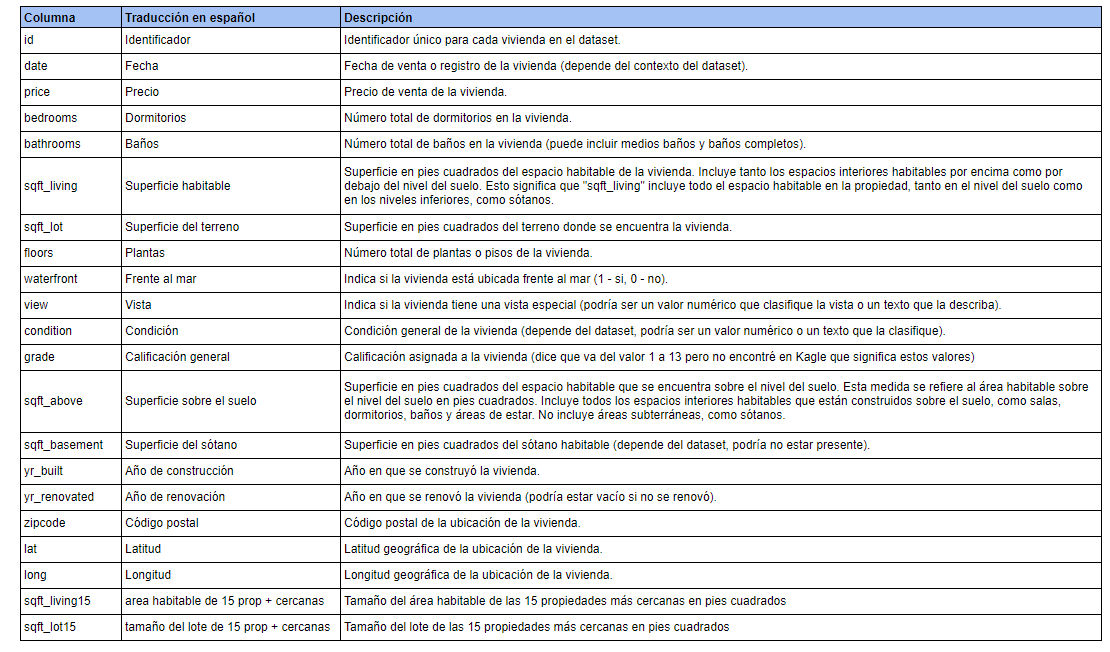


In [ ]:
#Vemos por pantalla los datos del dataset importado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Utilizamos el comando describe () para ver valores estadisticos como la media, valor mínimo, valor máximo etc. Al comando le aplique un formato de estilo ya que
#lo mostraba en notacion exponencial/cientifica y me dificultaba leerlo.
#df.describe ()
descripcion = df.describe().style.format("{:.2f}")
display(descripcion)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580306147.71,540088.58,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876569751.89,367126.83,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Luego de haber ejecutado este comando describe para obtener las medidas estadísticas principales hay varias cosas que veo que me hacen ruido que paso a detallar:


1. **bedrooms -->** que una propiedad tenga 33 habitaciones es exorbitante cuando la media es 3.370795 **(sería un outlier)**. En el dataset no encontre una tipificacion de la vivienda como por ejemplo casa / duplex / hotel / galpon cosas de ese estilo. Si estuviera en un trabajo formal buscaría el porque de ese valor a fin de ver si no fue error es basura o que.
2. **bathrooms	-->** el campo se describe como float64 lo cual no tiene sentido para mi o tiene baño o no tiene. Tampoco entiendo porque por ejemplo dice 2,5. Idem que lo que puse en campo anterior buscaria el porque.



In [ ]:
# Contamos el número de valores nullosCounts the number of null values
na_values = df.isna().sum()

# Prints 0, significa que no hay valores nullos.
print(na_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


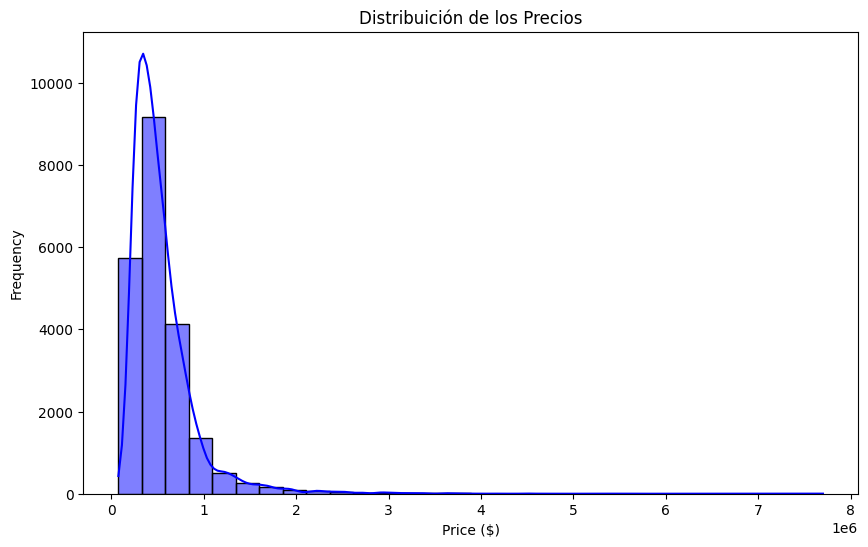

In [ ]:
# Visualización 1: Distribuición de los Precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, color='blue', kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribuición de los Precios')
plt.show()

**Hipótesis 1: ¿Más grande, más caro? Explorando la relación entre el tamaño y el precio de las viviendas.**

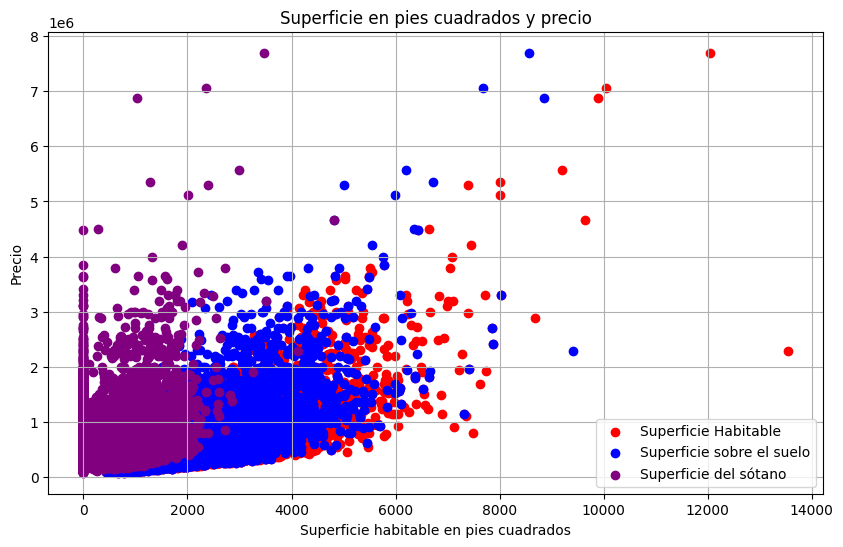

In [ ]:
# Gráfico de dispersión entre el tamaño y el precio de las viviendas
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], label = "Superficie Habitable", color = "red")
plt.scatter(df['sqft_above'], df['price'], label = "Superficie sobre el suelo", color = "blue")
plt.scatter(df['sqft_basement'], df['price'], label = "Superficie del sótano", color = "purple")
#plt.scatter(df['sqft_living15'], df['price'], label = "Area habitable de 15 prop + cercanas", color = "pink")
plt.xlabel('Superficie habitable en pies cuadrados')
plt.ylabel('Precio')
plt.title('Superficie en pies cuadrados y precio')
plt.legend()
plt.grid(True)
plt.show()

**Conclusión**

Desde mi punto de vista al observar el gráfico de dispersión (plt.scatter)
Vemos una tendencia a un recta con pendiente positiva, es decir que casas más grandes tienen a tener mayores precios. Pero también vemos una mayor concentracion de datos entre 0 y 6000 pie cuadrados, viendo que algunos estan dentro del cuadrante de precios entre 0 a 2 millones mientras que otros estan entre 3 y 4 millones o más. También se observa varios otros puntos dispersos donde se observa claramente que no siempre se cumple que mientras más pie cuadrados tenga una propiedad mayor es el precio.
En el gráfico puse todos las variables de superficie en pie cuadrados que tiene el dataset. Comente y descomente las distintas superficies a ver como se veía el gráfico y llegue a la conclusión que no hay una relación muy significativa entre el tamaño de la vivienda y su precio.

**Hipótesis 2: Impacto del número de habitaciones y baños en el precio de la vivienda**


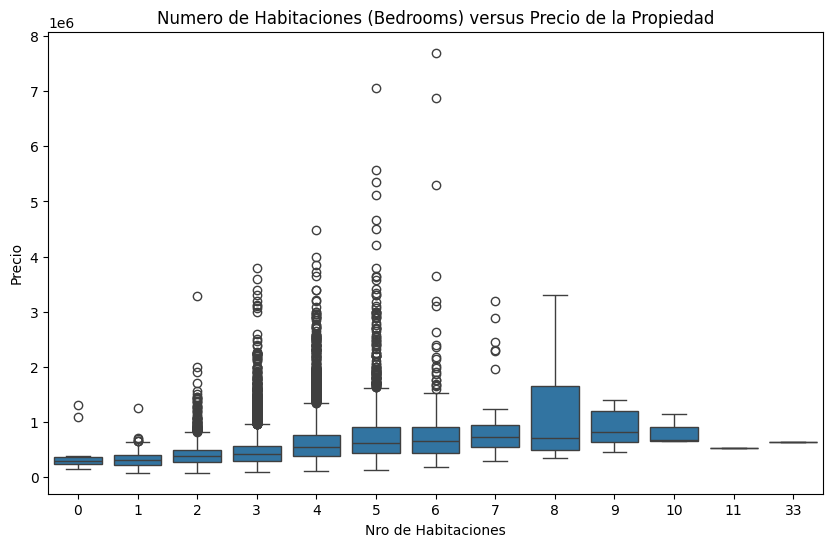

In [ ]:
# Numero de Habitaciones (Bedrooms) versus Precio de la Propiedad
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Numero de Habitaciones (Bedrooms) versus Precio de la Propiedad')
plt.xlabel('Nro de Habitaciones')
plt.ylabel('Precio')
plt.show()

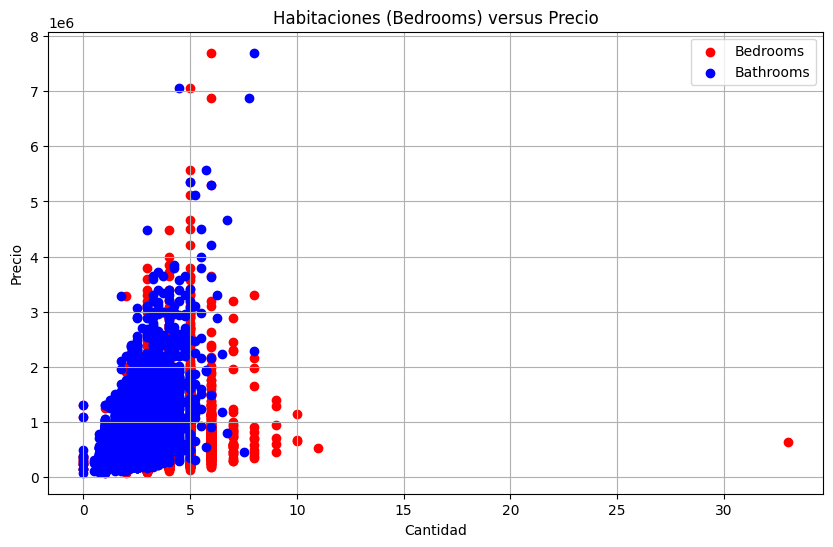

In [ ]:
# Grafico de Dispersión nro de habitaciones incluí aca también el nro de baños (bathrooms)
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], label = "Bedrooms", color = "red")
plt.scatter(df['bathrooms'], df['price'], label = "Bathrooms", color = "blue")
plt.xlabel('Cantidad')
plt.ylabel('Precio')
plt.title('Habitaciones (Bedrooms) versus Precio')
plt.legend()
plt.grid(True)
plt.show()

**Conclusión**

Nuevamente en este gráfico vemos que no hay una fuerte correlación entre el nro de habitaciones (bedrooms) y el precio ya que por lo que puede ver en el gráfico desde mi punto de vista es que los datos estan concentrados entre 0 a 5 habitaciones, y el precio va desde menos de un millon a 8 millones si bien la mayoria esta concentrado entre 0 a 4 millones.


# Entrega 2

### Utilización de Árbol de Desición para predecir el precio de un inmueble.

In [ ]:
#Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
#Preprocesamiento de datos
# Selección de características y variable objetivo
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
 #Entrenamiento del modelo de árbol de decisión
 # Crear el modelo de árbol de decisión

model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ajustar la profundidad máxima del árbol según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
#Evaluacion del modelo
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')



Mean Squared Error (MSE): 48815832351.54207
R-squared (R2): 0.67709423215527


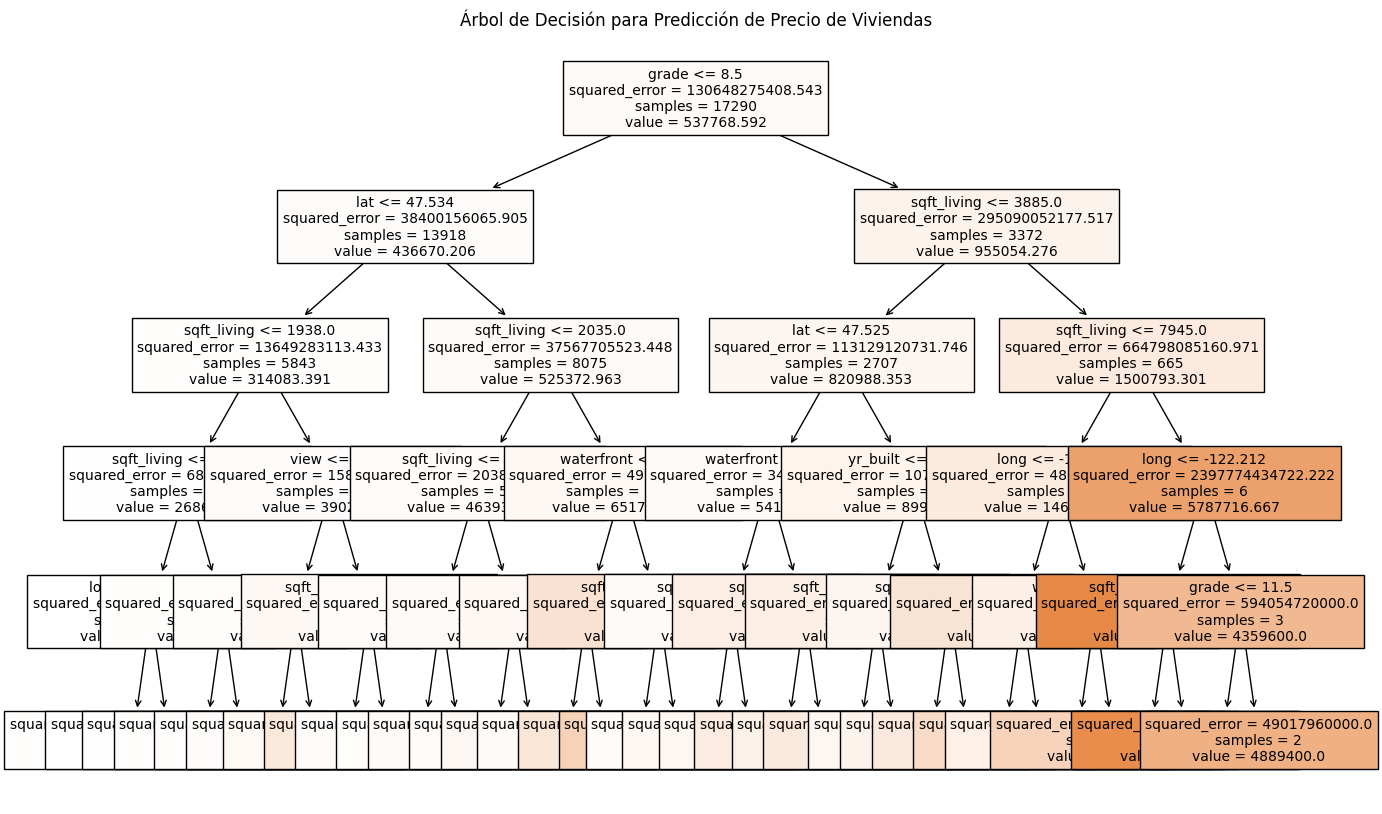

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Árbol de Decisión para Predicción de Precio de Viviendas")
plt.show()



In [ ]:
# Ejemplo de predicción para una nueva observación (por ejemplo, la primera fila del conjunto de prueba)
new_data = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(new_data)
real_price = y_test.iloc[0]

print(f'Características de la vivienda:\n{X_test.iloc[0]}')
print(f'Precio real: {real_price}')
print(f'Precio predicho: {predicted_price[0]}')


Características de la vivienda:
bedrooms             4.0000
bathrooms            2.2500
sqft_living       2070.0000
sqft_lot          8893.0000
floors               2.0000
waterfront           0.0000
view                 0.0000
condition            4.0000
grade                8.0000
sqft_above        2070.0000
sqft_basement        0.0000
yr_built          1986.0000
yr_renovated         0.0000
zipcode          98058.0000
lat                 47.4388
long              -122.1620
sqft_living15     2390.0000
sqft_lot15        7700.0000
Name: 735, dtype: float64
Precio real: 365000.0
Precio predicho: 425833.3047034765


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**Conclusión:**  

Repasando lo que significa "Mean Squared Error (MSE)" es una medida de calidad de un modelo de predicción. Se calcula promediando los cuadrados de los errores (las diferencias entre los valores predichos y los valores reales). Cuanto menor sea el MSE, mejor será el modelo en terminos de ajustes a los datos. En nuestro caso obtuvimos un  un MSE= 48,815,832,351.54 esto indica que, en promedio, el cuadrado de la diferencia entre los precios realies y los precios predichos por el modelo es de aprox 48 mil millones de dólares, lo cual es elevado pudiendo decir que el modelo no esta capturando bien la variabilidad de los datos, que quiza podriamos ajustarlo/mejorarlo.

En el ejemplo el modelo de árbol de decisión predijo un precio de venta **mayor** al precio real de la vivienda. La diferencia es de aproximadamente $60,833.30.

Luego repasando lo que significa el **coeficiente de determinación R-squared (R2) **es una medida estadística que representa la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes en el modelo. En otras palabras, R2 proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales.

El valor de R2 varía entre 0 y 1. Un R2 más cercano a 1 indica que el modelo explica una gran parte de la varianza de los datos observados, mientras que un R2 más cercano a 0 indica que el modelo no explica bien la varianza y puede ser deficiente en sus predicciones.

En nuestro dataset analizado, el **R-squared (R2) obtenido es aproximadamente 0.**677. Esto significa que el modelo de árbol de decisión **explica aproximadamente el 67.7% de la variabilidad de los datos observados.** Es decir, el modelo tiene una capacidad moderada para predecir el precio de las viviendas basado en las características seleccionadas en comparación con simplemente predecir la media de los precios.

### Utilización de K-Nearest Neighbors para intentar predecir  el precio de las casas basado en las características de las casas vecinas más cercanas.

In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
#Preprocesamiento de datos
# Selección de características y variable objetivo
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Entrenamiento del modelo KNN

# Crear el modelo KNN
model = KNeighborsRegressor(n_neighbors=5)  # Definimos el número de vecinos como 5 (esto se puede ajustar)

# Entrenar el modelo
model.fit(X_train, y_train)


KNeighborsRegressor()

In [6]:
#Evaluación del modelo
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 75023778082.42471
R-squared (R2): 0.5037345569802069


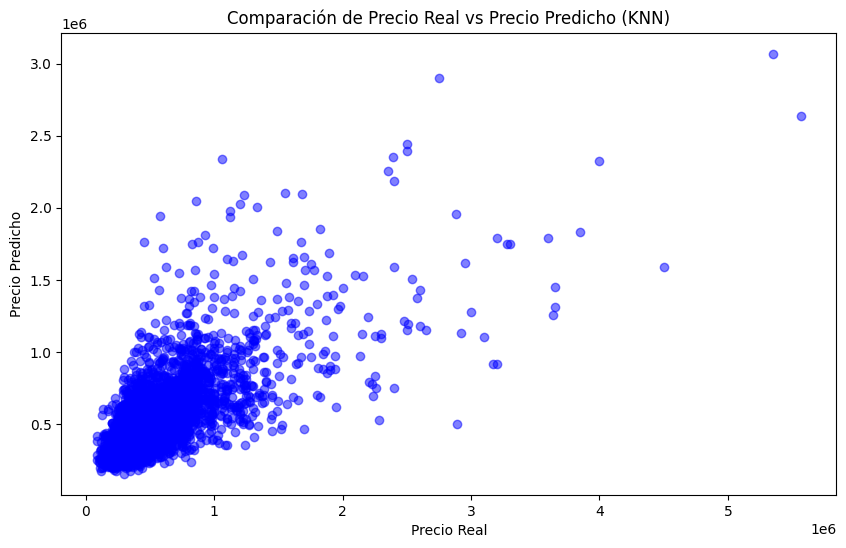

In [7]:
#Interpretación del modelo y visualización

# Gráfico para comparar precios reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Comparación de Precio Real vs Precio Predicho (KNN)')
plt.show()


In [8]:
 #Ejemplo de predicción y valores obtenidos

# Ejemplo de predicción para una nueva observación (por ejemplo, la primera fila del conjunto de prueba)
new_data = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(new_data)
real_price = y_test.iloc[0]

print(f'Características de la vivienda:\n{X_test.iloc[0]}')
print(f'Precio real: {real_price}')
print(f'Precio predicho: {predicted_price[0]}')



Características de la vivienda:
bedrooms             4.0000
bathrooms            2.2500
sqft_living       2070.0000
sqft_lot          8893.0000
floors               2.0000
waterfront           0.0000
view                 0.0000
condition            4.0000
grade                8.0000
sqft_above        2070.0000
sqft_basement        0.0000
yr_built          1986.0000
yr_renovated         0.0000
zipcode          98058.0000
lat                 47.4388
long              -122.1620
sqft_living15     2390.0000
sqft_lot15        7700.0000
Name: 735, dtype: float64
Precio real: 365000.0
Precio predicho: 392498.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


**Conclusión:**  El algoritmo K-Nearest Neighbors (KNN) se basa en encontrar las k casas más cercanas en términos de características (como número de habitaciones, baños, área habitable, etc.) y predecir el precio de la casa en función del promedio de los precios de estas casas cercanas.
En el  gráfico se muestra la comparación entre los precios reales y los precios predichos por el modelo KNN. Cada punto representa una casa del conjunto de prueba, donde el eje x es el precio real y el eje y es el precio predicho por el modelo vemos que la mayoria esta concentrado, pero para valores más lejanos no se corresponden lo que podemos inferir que quiza se ve afectado por los outliners.